In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [218]:
df = pd.read_csv('insurance.csv')
print(df.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


In [219]:
#ELiminamos las variables no numericas
df = df.drop(columns=['sex','region'])
#Reemplazamos los valores de la columna smoker 'yes' por 1 y 'no' por 0
df['smoker'] = df['smoker'].replace({'yes':1,'no':0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   int64  
 4   charges   1338 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 52.4 KB


/tmp/ipykernel_29980/1750981503.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes':1,'no':0})


In [220]:
#Checkeamos si hay valores repetidos
print(df.duplicated().sum())

1


In [221]:
#Como hay (1) valor repetido lo eliminamos
df = df.drop_duplicates()
print(df.duplicated().sum())

0


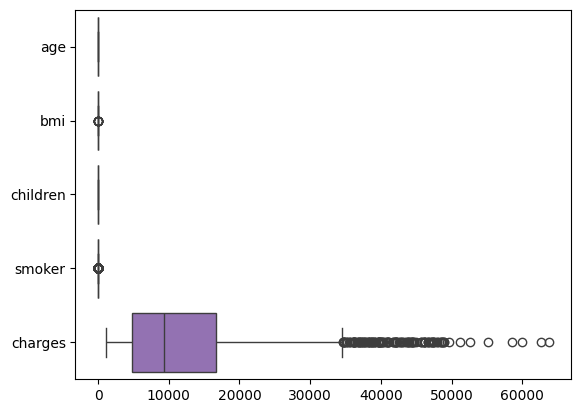

In [222]:
#Vamos a ver si hay outliers
sns.boxplot(data=df, orient='h')
plt.show()


In [223]:
#Eliminamos los outliers

def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_down = df[df[column] < lower_bound].shape[0]
    outliers_up = df[df[column] > upper_bound].shape[0]
    total_outliers = outliers_down + outliers_up

    print(f'Outliers Down para la columna {column}: {outliers_down}')
    print(f'Outliers Up para la columna {column}: {outliers_up}')
    print(f'Total de outliers en la columna {column}: {total_outliers}')    
    return  total_outliers, outliers_down, outliers_up


total_outliers_bmi, outliers_down_bmi, outliers_up_bmi = count_outliers(df, 'bmi')
total_outliers_charges, outliers_down_charges, outliers_up_charges = count_outliers(df, 'charges')


        

def delete_outliers(df, column, up, down,factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    if up !=0:
        df = df[df[column] <= upper_bound]
    elif down !=0:
        df = df[df[column] >= lower_bound]
    return df


df = delete_outliers(df, 'bmi', outliers_up_bmi, outliers_down_bmi, factor=1.34)
cuenta1, cuenta2, cuenta3 = count_outliers(df, 'bmi')
df = delete_outliers(df, 'charges', outliers_up_charges, outliers_down_charges, factor=0.6)
cuenta1, cuenta2, cuenta3 = count_outliers(df, 'charges')



Outliers Down para la columna bmi: 0
Outliers Up para la columna bmi: 9
Total de outliers en la columna bmi: 9
Outliers Down para la columna charges: 0
Outliers Up para la columna charges: 139
Total de outliers en la columna charges: 139
Outliers Down para la columna bmi: 0
Outliers Up para la columna bmi: 0
Total de outliers en la columna bmi: 0
Outliers Down para la columna charges: 0
Outliers Up para la columna charges: 0
Total de outliers en la columna charges: 0


age         1105
bmi         1105
children    1105
smoker      1105
charges     1105
dtype: int64

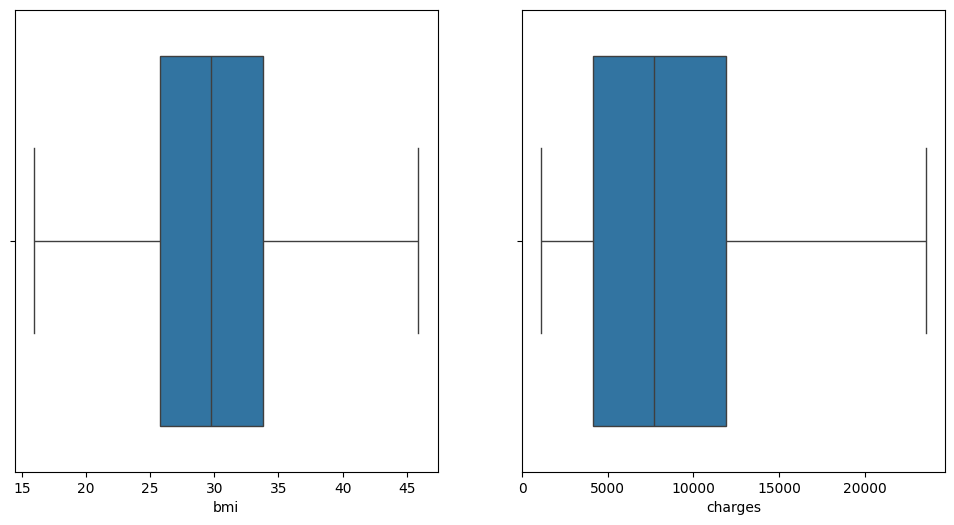

In [224]:
#Vamos a ver si hay outliers
figs, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, x='bmi', ax=axs[0])
sns.boxplot(data=df, x='charges', ax=axs[1])
df.count()


In [225]:
# Normalidad la calculamos usando el test de Shapiro-Wilk

from scipy.stats import shapiro
normalidad_age = shapiro(df['age'])
normalidad_bmi = shapiro(df['bmi'])
normalidad_children = shapiro(df['children'])
normalidad_smoker = shapiro(df['smoker'])
normalidad_charges = shapiro(df['charges'])
print(f"Normalidad de age: {normalidad_age}")
print(f"Normalidad de bmi: {normalidad_bmi}")
print(f"Normalidad de children: {normalidad_children}")
print(f"Normalidad de smoker: {normalidad_smoker}")
print(f"Normalidad de charges: {normalidad_charges}")



Normalidad de age: ShapiroResult(statistic=np.float64(0.9459518727050092), pvalue=np.float64(1.1212153150863811e-19))
Normalidad de bmi: ShapiroResult(statistic=np.float64(0.9934047755265093), pvalue=np.float64(8.149653613738792e-05))
Normalidad de children: ShapiroResult(statistic=np.float64(0.8153052647532781), pvalue=np.float64(9.000261411776954e-34))
Normalidad de smoker: ShapiroResult(statistic=np.float64(0.31136774632232533), pvalue=np.float64(2.472656799766499e-53))
Normalidad de charges: ShapiroResult(statistic=np.float64(0.9370505926813828), pvalue=np.float64(3.3050354442000514e-21))


Resultados del Test de Shapiro-Wilk:

    age: p-value ≈ 1.12×10−191.12×10−19 → No es normal.
    bmi: p-value ≈ 8.15×10−58.15×10−5 → No es normal.
    children: p-value ≈ 9.00×10−349.00×10−34 → No es normal.
    smoker: p-value ≈ 2.47×10−532.47×10−53 → No es normal.
    charges: p-value ≈ 3.31×10−213.31×10−21 → No es normal.

Conclusión:

Dado que ninguno de los p-valores es mayor a 0.05, se rechaza la hipótesis nula de que los datos siguen una distribución normal. Debido a esto no se puede hacer un test de correlación de Pearson, por lo que se utilizará el test de correlación de Spearman.(Tambien se puede utilizar el test de Kendall)


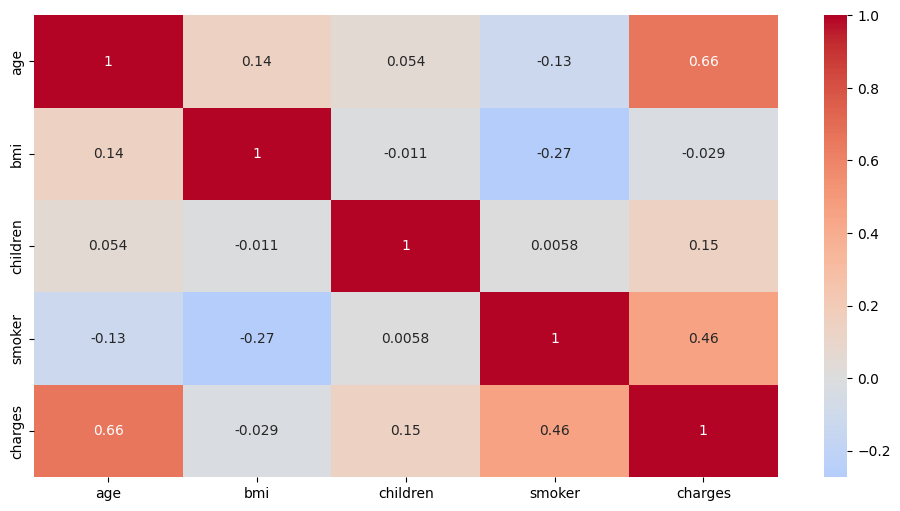

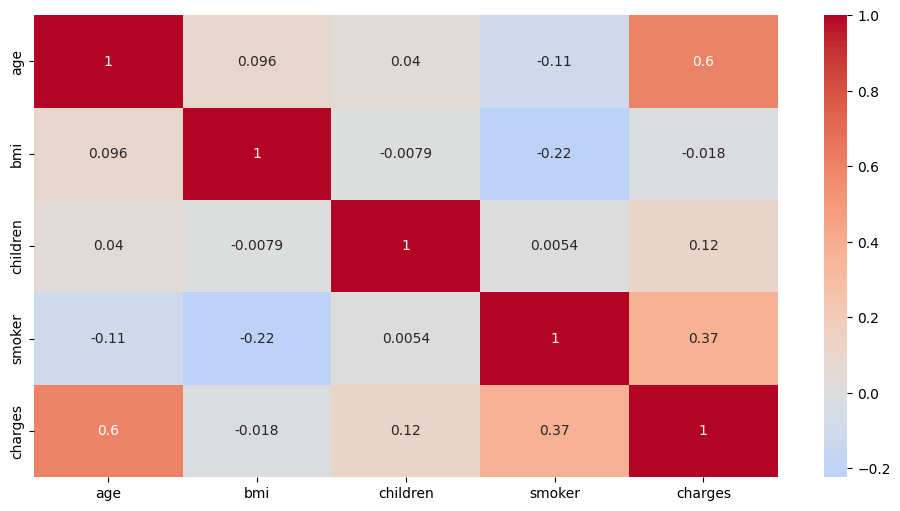

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
m_corr = df.corr(method='spearman')
sns.heatmap(m_corr, annot=True, cmap='coolwarm', center=0)
plt.show()

plt.figure(figsize=(12, 6))
m_corr = df.corr(method='kendall')
sns.heatmap(m_corr, annot=True, cmap='coolwarm', center=0)
plt.show()




Podemos observar que hay una correlación positiva entre el costo de la prima y la edad, esto se puede deber a que a medida que las personas envejecen, tienen más riesgo de enfermedades y por lo tanto el costo de la prima es mayor.

Pero tambien podemos observar que hay una correlaicon positiva entre el costo de la prima y si el individuo es fumador o no, esto se puede deber a que los fumadores tienen un mayor riesgo de enfermedades y por lo tanto el costo de la prima es mayor.

Para el ejercicio planteado voy a utilizar las variables age y charges, ya que son las que tienen una correlación positiva más alta. 


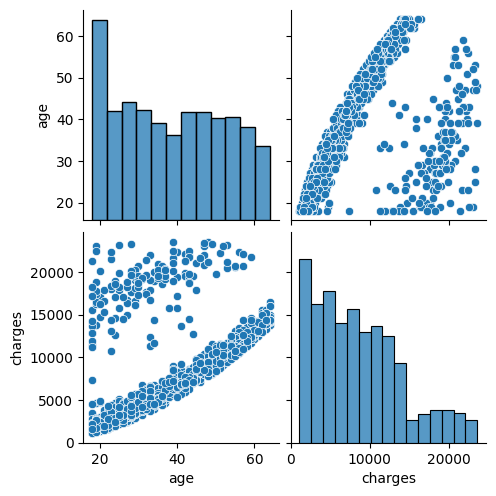

In [227]:
sns.pairplot(df[['age','charges']])

Text(0.5, 0, 'Distribucion de Charges')

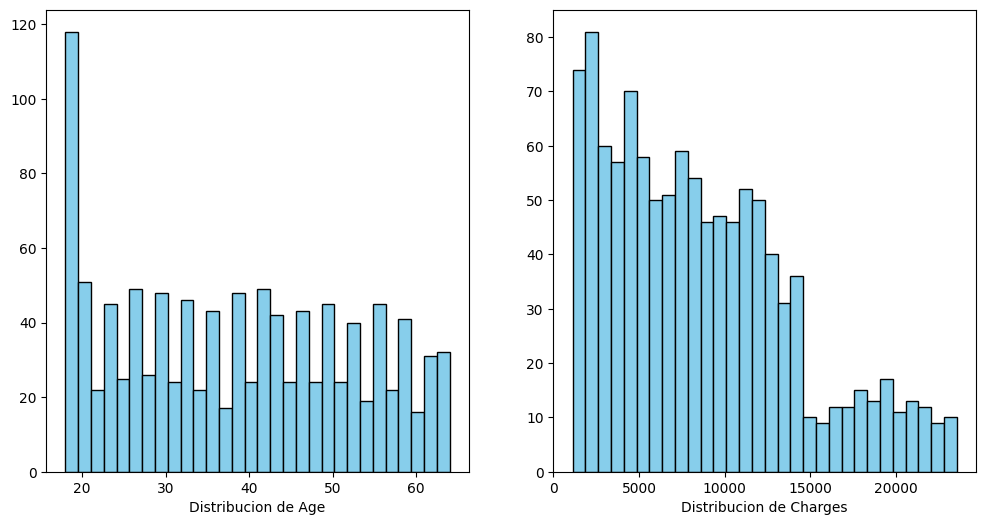

In [228]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Distribucion de Age')
plt.subplot(1, 2, 2)
plt.hist(df['charges'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Distribucion de Charges')



Intentaremos predecir el costo de la prima de un individuo en base a su edad.

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df[['age']]
Y=df['charges']

Xtrain , Xtest, ytrain , ytest = train_test_split(X,Y,test_size=0.25, random_state=42)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


In [230]:
#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")


Xtrain shape: (828, 1) | ytrain shape (828,)
Xtest shape: (277, 1) | ytest shape (277,)


Text(0.5, 1.0, 'Dataset separado en entrenamiento y testeo')

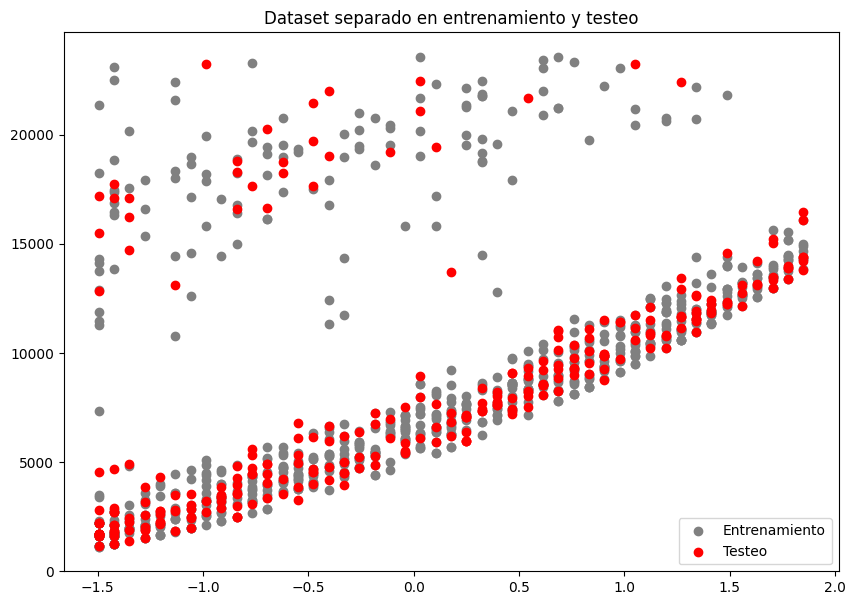

In [231]:
# Vemos gráficamente como queda el dataset separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='grey',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='red',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo")

En este caso pordriamos utilizar alguno de los 3 modelos de regresión, las tres estan basadas en el modelo OLS (mínimos cuadrados ordinarios).

    Linear Regression (OLS)
    Lasso: basada en OLS pero incorpora un peso Lambda para castigar aquellos valores demasiado altos que nos pueden conducir a overfitting y un poco entendimiento de la verdadera relación entre las variables predictoras y el objetivo.
    Ridge: basado en OLS y tambien incorpora una forma de calculo para castigar los valos muy altos y reducir notablemente el overfitting. Sin embargo, no realiza una selección de variables como es el caso de Lasso.


In [232]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lineal_reg = LinearRegression()
lineal_reg.fit(Xtrain,ytrain)


LinearRegression()

In [233]:
#Evaluamos el modelo
from sklearn.metrics import mean_squared_error, r2_score
#Primero predecimos con el conjunto de entrenamiento
print(f"LinearRegression accuracy: {lineal_reg.score(Xtrain, ytrain)}")

LinearRegression accuracy: 0.25704597087959224


In [234]:
from sklearn import metrics as ms
def calculate_metrics(y_true:None,y_pred:None):
  """Esta funcion calcula accuracy,mae,mse y retorna un diccionario con dichos valores"""
  r2 = ms.r2_score(y_true=y_true,y_pred=y_pred)
  mae = ms.mean_absolute_error(y_true=y_true,y_pred=y_pred)
  mse = ms.mean_squared_error(y_true=y_true,y_pred=y_pred)
  return {"R2":r2,"MAE":mae,"MSE":mse}

In [235]:
#Primero calculamos las metricas LinearRegression
y_pred = lineal_reg.predict(Xtest)
linear_r_metrics = calculate_metrics(y_true=ytest, y_pred=y_pred)
linear_r_metrics

{'R2': 0.29219314553511433,
 'MAE': np.float64(2968.7716085605543),
 'MSE': np.float64(19435502.402624372)}

Text(0.5, 1.0, 'Dataset separado en entrenamiento y testeo')

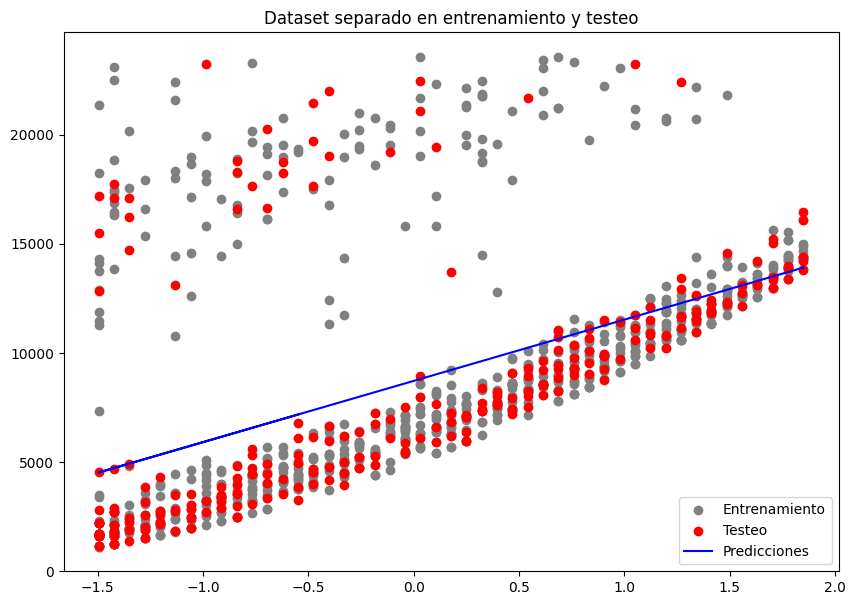

In [236]:
#Vamos a ver como se ve el modelo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='grey',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='red',label='Testeo')
plt.plot(Xtest,y_pred,c='blue',label='Predicciones')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo")



In [237]:
#Evaluamos el supuesto de linealidad de los residuos
from statsmodels.stats.stattools import durbin_watson
residuals = ytest - np.squeeze(y_pred)
dw = durbin_watson(residuals)
print(f"Durbin Watson must be between [0,4] where both extremes are residual correlated and the middle 2 means independency between errors:\n{dw}")

Durbin Watson must be between [0,4] where both extremes are residual correlated and the middle 2 means independency between errors:
2.1581132744487546


Dado que tu valor de DW es aproximadamente 2.158, puedes concluir que:

No hay una fuerte autocorrelación en los residuos: El valor está muy cerca de 2, lo que sugiere que los errores son aproximadamente independientes.
Ligera autocorrelación negativa: Aunque el valor es ligeramente mayor que 2, la diferencia no es significativa, por lo que la autocorrelación negativa es muy leve.

Text(0.5, 1.0, 'Homocedasticity')

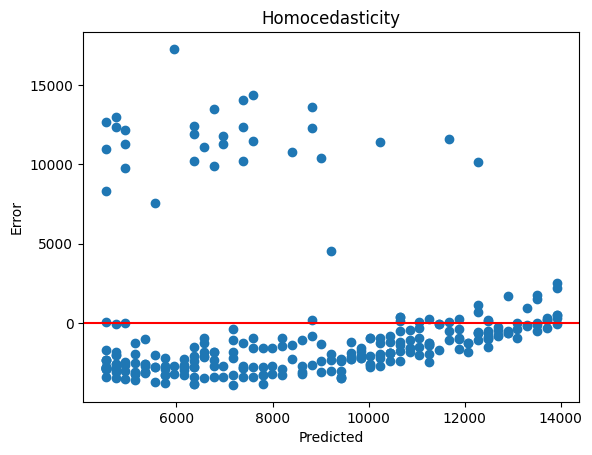

In [238]:
#Evaluamos el supuesto de homoscedasticidad
plt.scatter(y_pred,residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Error')
plt.title('Homocedasticity')

Vamos a realizar un modelo de regresion con SVR o DT para comparar los resultados con los modelos de regresion lineal.

In [239]:
from sklearn.svm import SVR
# X = df[['age']].to_numpy()
# Y = df['charges'].to_numpy()
svr1 = SVR(C=100).fit(X,Y)
svr2 = SVR(C=0.1).fit(X,Y)
svr3 = SVR(C=0.01).fit(X,Y)


In [240]:
svr1 = SVR(C=100).fit(X,Y)
svr2 = SVR(C=0.1).fit(X,Y)
svr3 = SVR(C=0.01).fit(X,Y)

In [241]:
# Generar prediccion con cada modelo
ypred1 = svr1.predict(X)
ypred2 = svr2.predict(X)
ypred3 = svr3.predict(X)

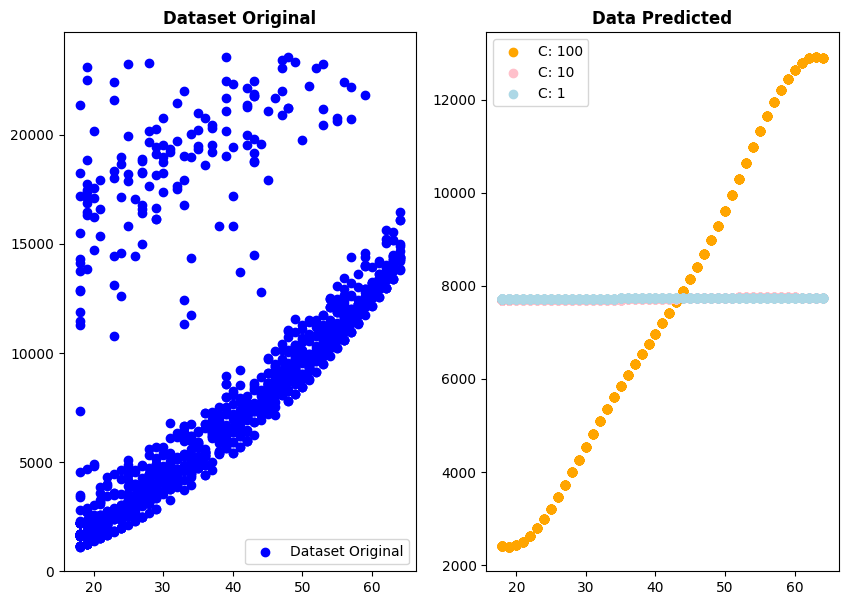

In [243]:
# Creamos una figura con 2 frames

fig, axs = plt.subplots(1,2,figsize=(10,7),dpi=100)

axs[0].scatter(X['age'],Y,c='blue',label='Dataset Original')
axs[0].set_title('Dataset Original',fontweight='bold')
axs[0].legend()

axs[1].scatter(X['age'],ypred1,c='orange',label='C: 100')
axs[1].scatter(X['age'],ypred2,c='pink',label='C: 10')
axs[1].scatter(X['age'],ypred3,c='lightblue',label='C: 1')
axs[1].set_title('Data Predicted',fontweight='bold')
axs[1].legend()

plt.show()

In [244]:
from sklearn.tree import DecisionTreeRegressor

In [245]:
dt1 = DecisionTreeRegressor(max_depth=3).fit(X,Y)
dt2 = DecisionTreeRegressor(max_depth=10).fit(X,Y)
dt3 = DecisionTreeRegressor().fit(X,Y)

In [246]:
ypred1 = dt1.predict(X)
ypred2 = dt2.predict(X)
ypred3 = dt3.predict(X)

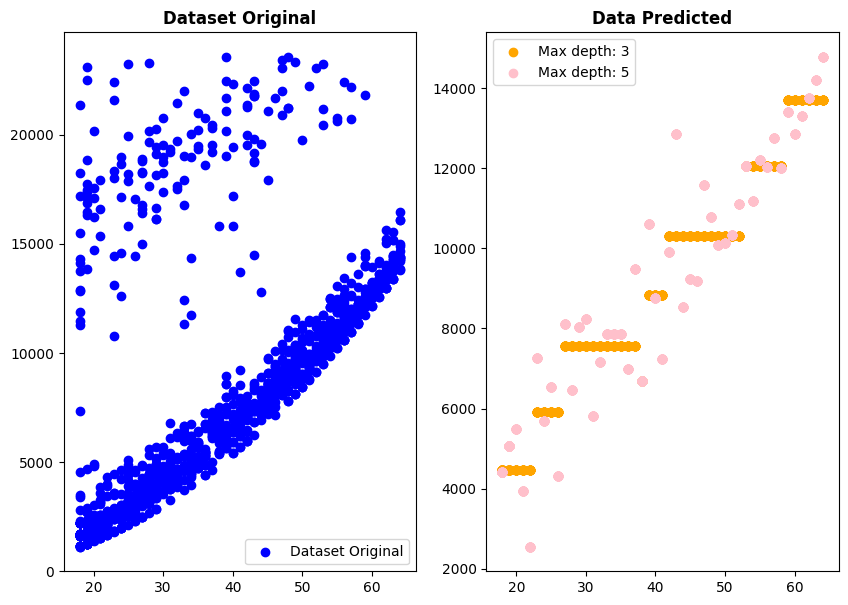

In [248]:
# Creamos una figura con 2 frames

fig, axs = plt.subplots(1,2,figsize=(10,7),dpi=100)

axs[0].scatter(X['age'],Y,c='blue',label='Dataset Original')
axs[0].set_title('Dataset Original',fontweight='bold')
axs[0].legend()

axs[1].scatter(X['age'],ypred1,c='orange',label='Max depth: 3')
axs[1].scatter(X['age'],ypred2,c='pink',label='Max depth: 5')
# axs[1].scatter(X[:,1],ypred3,c='lightblue',label='Max depth: forever')
axs[1].set_title('Data Predicted',fontweight='bold')
axs[1].legend()

plt.show()

In [250]:
mse_svr1 = ms.mean_squared_error(Y,svr1.predict(X))
mse_svr2 = ms.mean_squared_error(Y,svr2.predict(X))
mse_svr3 = ms.mean_squared_error(Y,svr3.predict(X))

mse_dt1 = ms.mean_squared_error(Y,dt1.predict(X))
mse_dt2 = ms.mean_squared_error(Y,dt2.predict(X))
mse_dt3 = ms.mean_squared_error(Y,dt3.predict(X))

print(f"SVR C: 100 MSE: {mse_svr1}")
print(f"SVR C: 10 MSE: {mse_svr2}")
print(f"SVR C: 1 MSE: {mse_svr3}")

print(f"DT Max Depth: 3 MSE: {mse_dt1}")
print(f"DT Max Depth: 10 MSE: {mse_dt2}")
print(f"DT Max Depth: None MSE: {mse_dt3}")


SVR C: 100 MSE: 25668121.822748657
SVR C: 10 MSE: 30571770.70863771
SVR C: 1 MSE: 30661919.654469624
DT Max Depth: 3 MSE: 21603009.41455924
DT Max Depth: 10 MSE: 20725472.44433478
DT Max Depth: None MSE: 20710725.50607178


Evaluación de Modelos
Modelos de SVR (Support Vector Regression)
SVR C: 100: MSE = 25,668,121.82
SVR C: 10: MSE = 30,571,770.71
SVR C: 1: MSE = 30,661,919.65
Los modelos de SVR con diferentes valores de C muestran que el modelo con C = 100 tiene el menor error cuadrático medio (MSE), pero aún así, el MSE es bastante alto en comparación con otros modelos.

Modelos de Árboles de Decisión (Decision Tree)
DT Max Depth: 3: MSE = 21,603,009.41
DT Max Depth: 10: MSE = 20,725,472.44
DT Max Depth: None: MSE = 20,710,725.51
Los modelos de árboles de decisión muestran que aumentar la profundidad del árbol reduce el MSE, con el modelo sin límite de profundidad (Max Depth: None) teniendo el menor MSE. Sin embargo, la diferencia entre Max Depth: 10 y Max Depth: None es mínima.

Comparación con Regresión Lineal
Linear Regression:
R²: 0.292
MAE: 2,968.77
MSE: 19,435,502.40
El modelo de regresión lineal tiene un MSE más bajo que los modelos de SVR y comparable con los modelos de árboles de decisión. Sin embargo, el R² de 0.292 indica que el modelo de regresión lineal solo explica el 29.2% de la variabilidad de los datos, lo cual no es muy alto.

Conclusión General
Normalidad: Ninguna de las variables sigue una distribución normal, lo que puede afectar la performance de los modelos que asumen normalidad.
Modelos de SVR: No parecen ser los más adecuados para tus datos, ya que tienen un MSE más alto en comparación con otros modelos.
Modelos de Árboles de Decisión: Tienen un MSE más bajo que los modelos de SVR y comparable con la regresión lineal. El modelo sin límite de profundidad (Max Depth: None) tiene el menor MSE.
Regresión Lineal: Tiene un MSE comparable con los mejores modelos de árboles de decisión, pero un R² bajo, indicando que no explica bien la variabilidad de los datos.